## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Loading my CSV files
drivers = pd.read_csv(r"C:\Users\THINKPAD\OneDrive\Desktop\DATA FILES\AMDARI PROJECTS\Project 2\drivers.csv")
trips = pd.read_csv(r"C:\Users\THINKPAD\OneDrive\Desktop\DATA FILES\AMDARI PROJECTS\Project 2\trips.csv")

In [3]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   driver_id        5000 non-null   object 
 1   rating           5000 non-null   float64
 2   vehicle_type     5000 non-null   object 
 3   signup_date      5000 non-null   object 
 4   last_active      5000 non-null   object 
 5   city             5000 non-null   object 
 6   acceptance_rate  5000 non-null   float64
dtypes: float64(2), object(5)
memory usage: 273.6+ KB


In [4]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   trip_id           200000 non-null  object 
 1   user_id           200000 non-null  object 
 2   driver_id         200000 non-null  object 
 3   fare              200000 non-null  float64
 4   surge_multiplier  200000 non-null  float64
 5   tip               200000 non-null  float64
 6   payment_type      200000 non-null  object 
 7   pickup_time       200000 non-null  object 
 8   dropoff_time      200000 non-null  object 
 9   pickup_lat        200000 non-null  float64
 10  pickup_lng        200000 non-null  float64
 11  dropoff_lat       200000 non-null  float64
 12  dropoff_lng       200000 non-null  float64
 13  weather           200000 non-null  object 
 14  city              200000 non-null  object 
 15  loyalty_status    200000 non-null  object 
dtypes: float64(7), objec

In [5]:
def schema_summary(df, name="DataFrame"):
    print(f"\n=== Schema Summary: {name} ===")
    for col in df.columns:
        print(f"{col:20} | {df[col].dtype} | Example: {df[col].iloc[0]}")

In [6]:
schema_summary(drivers, "Drivers")


=== Schema Summary: Drivers ===
driver_id            | object | Example: D00000
rating               | float64 | Example: 3.1
vehicle_type         | object | Example: SUV
signup_date          | object | Example: 2025-01-20
last_active          | object | Example: 2025-01-06 18:23:09.312275
city                 | object | Example: Cairo
acceptance_rate      | float64 | Example: 0.6795548428895427


**INSIGHT** The Drivers table captures key operational and behavioral attributes of each driver. It combines identification fields (driver_id), performance indicators (rating, acceptance_rate), and lifecycle information (signup_date, last_active). The presence of categorical fields like vehicle_type and city helps segment drivers by fleet composition and geography. Overall, the schema supports analyses related to driver quality, engagement, retention, and supply distribution across cities.

In [7]:

schema_summary(trips, "Trips")


=== Schema Summary: Trips ===
trip_id              | object | Example: T000000
user_id              | object | Example: R05207
driver_id            | object | Example: D00315
fare                 | float64 | Example: 12.11
surge_multiplier     | float64 | Example: 1.0
tip                  | float64 | Example: 0.0
payment_type         | object | Example: Card
pickup_time          | object | Example: 2024-11-27 18:41:50+02:27
dropoff_time         | object | Example: 2024-11-27 19:33:50+02:27
pickup_lat           | float64 | Example: -1.1081232821936116
pickup_lng           | float64 | Example: 36.91220902442938
dropoff_lat          | float64 | Example: -1.0681553199874247
dropoff_lng          | float64 | Example: 36.87537713357951
weather              | object | Example: Foggy
city                 | object | Example: Nairobi
loyalty_status       | object | Example: Bronze


**INGSIGHT** The Trips table provides a detailed record of each completed ride, linking riders and drivers through trip_id, user_id, and driver_id. It includes financial metrics (fare, tip, surge_multiplier), temporal data (pickup_time, dropoff_time), and precise geospatial coordinates for pickup and dropoff. Contextual fields such as weather, payment_type, city, and loyalty_status enrich the dataset, enabling deeper insights into demand patterns, customer behavior, and operational conditions. This schema is well‑structured for analyzing trip efficiency, pricing dynamics, and city‑level mobility trends.

In [8]:
def datatypes_table(df, name="DataFrame"):
    print(f"\n=== Data Types Table: {name} ===")
    display(pd.DataFrame({
        "Column": df.columns,
        "Data Type": df.dtypes.values
    }))

In [9]:
datatypes_table(drivers, "Drivers")


=== Data Types Table: Drivers ===


,Column,Data Type
0,driver_id,object
1,rating,float64
2,vehicle_type,object
3,signup_date,object
4,last_active,object
5,city,object
6,acceptance_rate,float64


**Insight** The Drivers table is mostly made up of categorical details like IDs, vehicle type, and city, combined with a few numeric performance metrics such as rating and acceptance rate. Dates are stored as text, which means they’ll need conversion before any time‑based analysis. Overall, the structure is simple and focused on capturing each driver’s profile and activity.

In [10]:
datatypes_table(trips, "Trips")


=== Data Types Table: Trips ===


,Column,Data Type
0,trip_id,object
1,user_id,object
2,driver_id,object
3,fare,float64
4,surge_multiplier,float64
5,tip,float64
6,payment_type,object
7,pickup_time,object
8,dropoff_time,object
9,pickup_lat,float64


**Insight** The Trips table mixes identifiers, numeric trip metrics, timestamps, and location coordinates, giving a detailed picture of each ride. Most operational fields like fare, surge, and coordinates are stored as floats, while IDs, payment type, weather, city, and loyalty status are kept as text. The pickup and dropoff times are still in object format, so they’ll need conversion before doing any time‑based analysis. Overall, the structure captures everything needed to understand trip behavior and conditions.

In [11]:
#Cleaning & Preprocessing of the dataset of the riders

def clean_drivers(df):
    df = df.copy()

    df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce')
    df['last_active'] = pd.to_datetime(df['last_active'], errors='coerce')

    df['vehicle_type'] = df['vehicle_type'].str.title()
    df['city'] = df['city'].str.title()

    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    df['acceptance_rate'] = pd.to_numeric(df['acceptance_rate'], errors='coerce')

    df = df.drop_duplicates(subset='driver_id')

    return df

**Insight on the data cleaning for the drivers** This cleaning step standardizes the Drivers dataset by converting the date fields into proper datetime format, fixing the text columns so they’re consistently capitalized, and ensuring the numeric fields like rating and acceptance rate are actually treated as numbers. It also removes any duplicate driver records based on driver_id, so the final dataset is clean, consistent, and ready for further analysis.

In [12]:
def clean_trips(df):
    df = df.copy()

    # Fixing the Future Warning:so i specify utc=True for the mixed time zones
    df['pickup_time'] = pd.to_datetime(df['pickup_time'], errors='coerce', utc=True)
    df['dropoff_time'] = pd.to_datetime(df['dropoff_time'], errors='coerce', utc=True)

    # Convert numeric columns safely
    numeric_cols = [
        'fare', 'surge_multiplier', 'tip',
        'pickup_lat', 'pickup_lng', 'dropoff_lat', 'dropoff_lng'
    ]
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Standardize text columns
    df['payment_type'] = df['payment_type'].str.title()
    df['weather'] = df['weather'].str.title()
    df['city'] = df['city'].str.title()
    df['loyalty_status'] = df['loyalty_status'].str.title()

    # Remove duplicate trips
    df = df.drop_duplicates(subset='trip_id')

    return df

**Insight on the data cleaning for the Trips**  The Trips cleaning function standardizes the dataset by converting the pickup and dropoff times into proper datetime format, fixing the text fields so they’re consistently formatted, and ensuring all numeric values like fare, surge, tips, and coordinates are treated as actual numbers. It also removes any duplicate trip records based on trip_id. After this step, the Trips data is clean, consistent, and ready for analysis or merging with the Drivers dataset.

In [13]:
# Applying the cleaning to both dataset
drivers_clean = clean_drivers(drivers)
trips_clean = clean_trips(trips)

In [14]:
# Rearranging the dataset by merging the Drivers and Trips
merged = trips_clean.merge(
    drivers_clean,
    on='driver_id',
    how='left',
    suffixes=('_trip', '_driver')
)

print("Merged shape:", merged.shape)
display(merged.head())

Merged shape: (200000, 22)


,trip_id,user_id,driver_id,fare,surge_multiplier,tip,payment_type,pickup_time,dropoff_time,pickup_lat,...,dropoff_lng,weather,city_trip,loyalty_status,rating,vehicle_type,signup_date,last_active,city_driver,acceptance_rate
0,T000000,R05207,D00315,12.11,1.0,0.00,Card,2024-11-27 16:14:50+00:00,2024-11-27 17:06:50+00:00,-1.108123,...,36.875377,Foggy,Nairobi,Bronze,4.1,Sedan,2024-07-21,2025-03-21 22:47:26.558938,Nairobi,0.549628
1,T000001,R09453,D03717,8.73,1.0,0.02,Card,2024-10-28 22:59:48+00:00,2024-10-28 23:12:48+00:00,6.675266,...,3.525620,Sunny,Lagos,Gold,4.9,Suv,2023-05-06,2025-04-12 08:36:21.207528,Lagos,0.629250
2,T000002,R00567,D02035,19.68,1.0,0.00,Card,2025-02-17 03:09:41+00:00,2025-02-17 03:25:41+00:00,-1.248589,...,37.018586,Cloudy,Nairobi,Bronze,4.7,Sedan,2023-08-09,2025-04-19 05:19:12.026949,Nairobi,0.990000
3,T000003,R09573,D02657,16.43,1.0,0.01,Mobile Money,2024-06-18 17:22:14+00:00,2024-06-18 17:27:14+00:00,29.819554,...,31.232978,Cloudy,Cairo,Bronze,3.9,Sedan,2023-04-22,2025-02-08 22:15:23.685705,Cairo,0.247121
4,T000004,R03446,D01026,8.70,1.0,1.06,Card,2024-10-05 07:31:16+00:00,2024-10-05 08:01:16+00:00,-1.676479,...,36.694063,Sunny,Nairobi,Gold,4.2,Sedan,2024-08-22,2025-04-13 11:24:50.358526,Nairobi,0.611031


In [15]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   trip_id           200000 non-null  object             
 1   user_id           200000 non-null  object             
 2   driver_id         200000 non-null  object             
 3   fare              200000 non-null  float64            
 4   surge_multiplier  200000 non-null  float64            
 5   tip               200000 non-null  float64            
 6   payment_type      200000 non-null  object             
 7   pickup_time       200000 non-null  datetime64[ns, UTC]
 8   dropoff_time      200000 non-null  datetime64[ns, UTC]
 9   pickup_lat        200000 non-null  float64            
 10  pickup_lng        200000 non-null  float64            
 11  dropoff_lat       200000 non-null  float64            
 12  dropoff_lng       200000 non-null  float64  

In [16]:
merged.describe()

,fare,surge_multiplier,tip,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,rating,signup_date,last_active,acceptance_rate
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000,200000,200000.000000
mean,15.401285,1.141499,0.469566,11.849600,23.924133,11.849589,23.924173,4.173626,2023-10-23 14:01:46.847999744,2025-03-07 14:07:45.161059328,0.694781
min,2.970000,1.000000,0.000000,-1.786360,2.879224,-1.833220,2.830979,3.100000,2022-04-27 00:00:00,2022-04-28 16:45:23.765979,0.100000
25%,11.000000,1.000000,0.000000,-1.172683,3.496574,-1.172868,3.497195,3.700000,2023-01-18 00:00:00,2025-03-13 12:30:52.353133056,0.564874
50%,14.130000,1.000000,0.000000,6.525574,31.238814,6.525235,31.239118,4.200000,2023-10-19 00:00:00,2025-04-08 11:09:10.464143104,0.696067
75%,18.350000,1.200000,0.400000,29.934766,36.703772,29.935056,36.704067,4.700000,2024-07-28 00:00:00,2025-04-19 19:34:36.690178048,0.835793
max,82.740000,3.800000,21.860000,30.544251,37.317090,30.592457,37.364817,5.000000,2025-04-26 00:00:00,2025-04-27 16:20:56.061019,0.990000
std,6.163199,0.255362,1.100545,13.362151,14.577572,13.362229,14.577642,0.594107,NaN,NaN,0.185828


In [17]:
summary = merged.agg({
    'fare': ['count', 'mean', 'min', 'max'],
    'tip': ['count', 'mean', 'min', 'max'],
})
summary = summary.round(2)
summary

,fare,tip
count,200000.00,200000.00
mean,15.40,0.47
min,2.97,0.00
max,82.74,21.86


In [18]:
# Setting the visual style needed.
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

**INSIGHT** Set and add a white background with light gridlines behind your plots, which will Make the harts cleaner and easier to read.

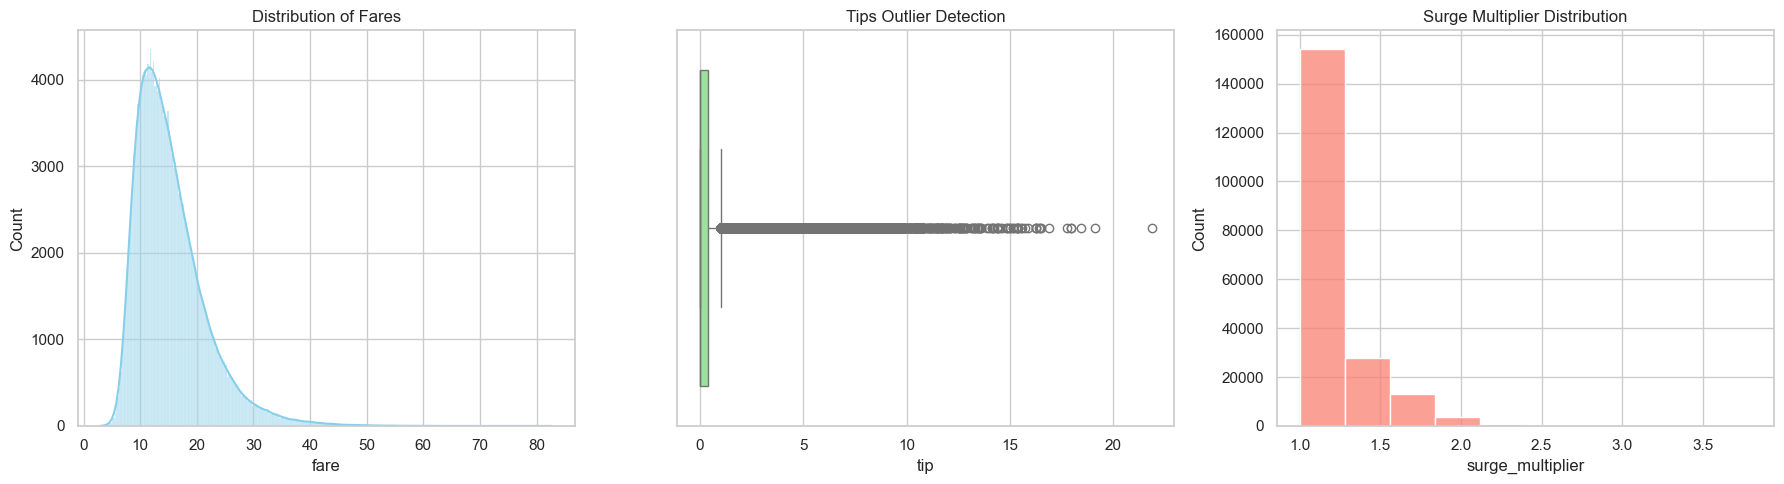

In [19]:
# --- 1. Univariate Analysis: Target Variables ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(merged['fare'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Fares')

sns.boxplot(x=merged['tip'], ax=axes[1], color='lightgreen')
axes[1].set_title('Tips Outlier Detection')

sns.histplot(merged['surge_multiplier'], bins=10, ax=axes[2], color='salmon')
axes[2].set_title('Surge Multiplier Distribution')
plt.tight_layout()
plt.show()

**INSIGHT**“Our analysis shows most fares fall between $5–$20 in the distribution of fares grid, with a small number of longer, higher‑value trips. From the Boxplot, Tips are largely zero, but a few unusually high tips appear as statistical outliers, reflecting rare but genuine customer generosity. Surge multipliers remain mostly at 1.0, confirming that surge pricing is infrequent but impactful when it occurs.”

## Univariate Analysis

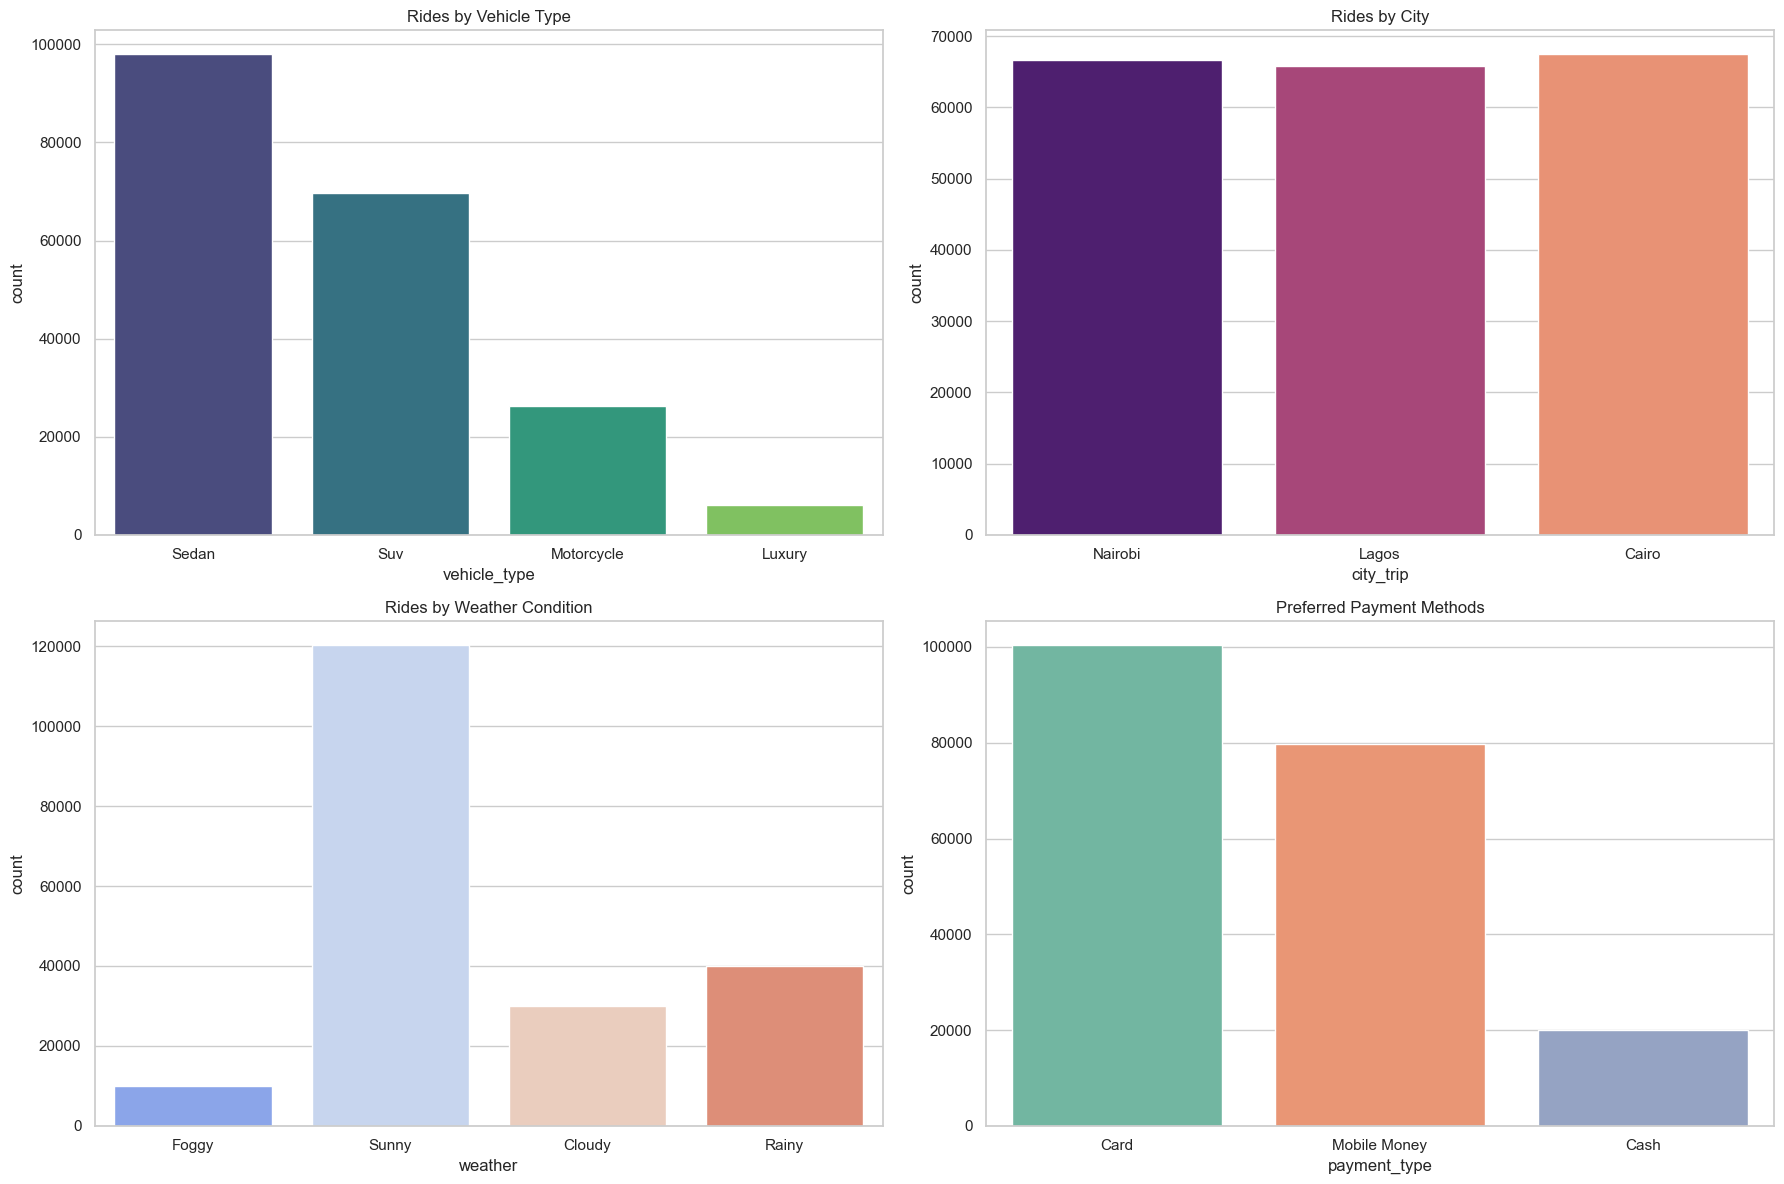

In [20]:
#Univariate Analysis: Categorical Variables ---
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Updated countplot calls to avoid FutureWarning
sns.countplot(data=merged, x='vehicle_type', hue='vehicle_type', ax=axes[0,0], palette='viridis', legend=False)
axes[0,0].set_title('Rides by Vehicle Type')

sns.countplot(data=merged, x='city_trip', hue='city_trip', ax=axes[0,1], palette='magma', legend=False)
axes[0,1].set_title('Rides by City')

sns.countplot(data=merged, x='weather', hue='weather', ax=axes[1,0], palette='coolwarm', legend=False)
axes[1,0].set_title('Rides by Weather Condition')

sns.countplot(data=merged, x='payment_type', hue='payment_type', ax=axes[1,1], palette='Set2', legend=False)
axes[1,1].set_title('Preferred Payment Methods')
plt.tight_layout()
plt.show()

**INSIGHT & RECOMMENDATION** “ This categorical analysis reveals strong operational patterns. Sedans dominate ride demand, suggesting they remain our most efficient fleet investment. Ride volumes across Nairobi, Lagos, and Cairo are relatively balanced, indicating stable multi‑city engagement. Sunny weather drives the highest ride activity, while foggy conditions suppress demand. Card payments lead overall, followed by mobile money, showing a clear customer preference for digital transactions. Based on these insights, we should prioritize sedan availability, maintain balanced city operations, strengthen weather‑based surge strategies, and continue optimizing digital payment experiences to support customer convenience and operational efficiency.”

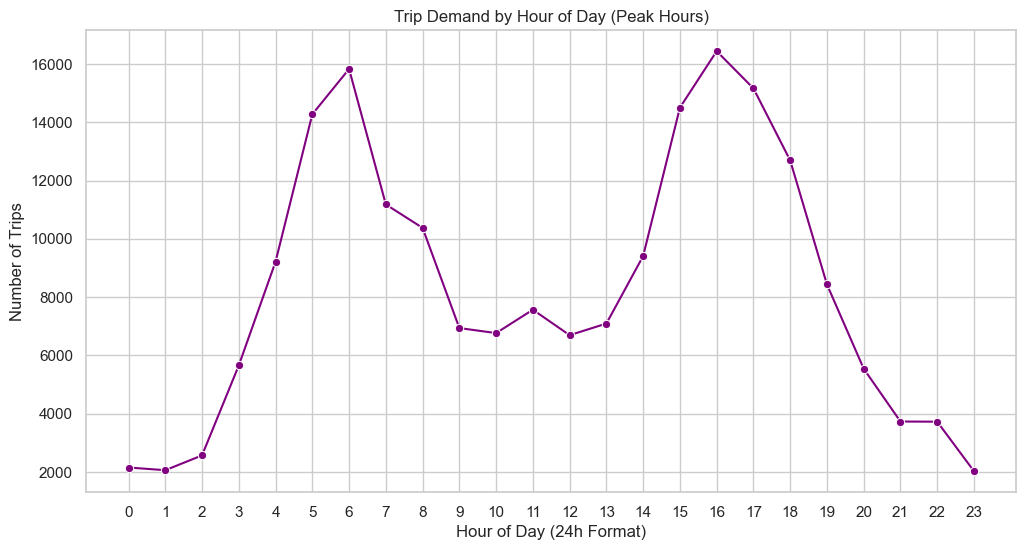

In [21]:
# Here we want toTemporally Analysize and Find the Peak Hours ---
# by Extracting the hour and day of week
merged['pickup_hour'] = merged['pickup_time'].dt.hour
merged['day_of_week'] = merged['pickup_time'].dt.day_name()

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged.groupby('pickup_hour').size().reset_index(name='count'), 
             x='pickup_hour', y='count', marker='o', color='purple')
plt.xticks(range(0, 24))
plt.title('Trip Demand by Hour of Day (Peak Hours)')
plt.xlabel('Hour of Day (24h Format)')
plt.ylabel('Number of Trips')
plt.show()

**INSIGHT** The grid analysis shows clear demand peaks at 7 AM and 5 PM, aligning with morning and evening commute patterns. Midday demand drops significantly, and late‑night activity remains minimal. This pattern highlights strong reliance on our service during work‑related travel. To optimize operations, we should increase driver availability during peak hours, apply targeted surge strategies, and reduce idle fleet capacity during low‑demand periods to improve efficiency and customer experience.”

## Bivariate analysis

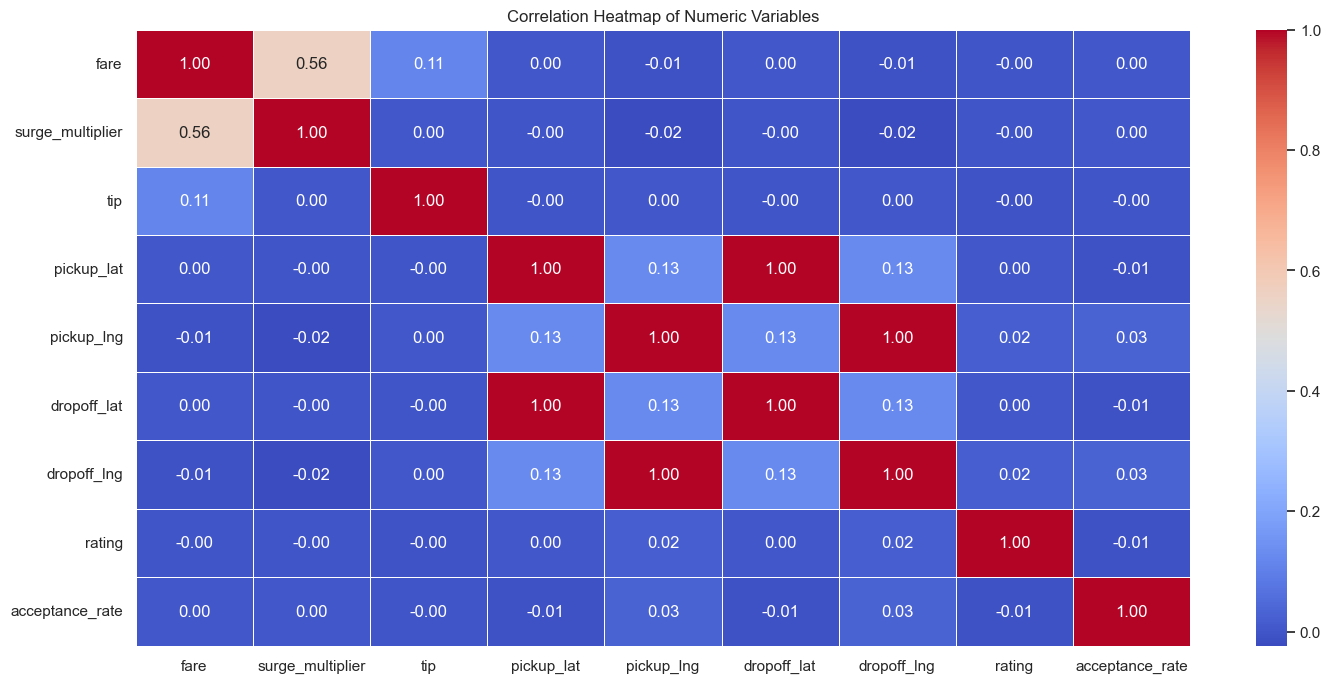

In [22]:
# Select only numeric columns for correlation
numeric_cols = merged.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = merged[numeric_cols].corr()

plt.figure(figsize=(17, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

**INSIGHT & RECOMMENDATION** The heatmap shows that fare has a moderate positive correlation with surge multiplier, indicating that surge pricing is a key driver of higher fares. Tips show weak correlations with most variables, suggesting tipping is influenced more by rider behavior than trip characteristics. Pickup and dropoff coordinates are strongly correlated within their pairs, reflecting geographic consistency. Driver metrics like rating and acceptance rate show minimal relationship with trip‑level financial outcomes.

**Recommendations**
- Monitor surge pricing impact: Since surge strongly influences fare, consider optimizing surge rules to balance revenue and rider satisfaction.

- Explore tipping behavior separately: Weak correlations suggest tipping may require behavioral or incentive‑based analysis rather than operational adjustments.

- Use location clusters: Strong coordinate correlations indicate potential for geographic segmentation to improve routing, pricing, or driver allocation.

- Investigate driver performance factors: Low correlation with trip metrics suggests ratings and acceptance rates may be influenced by non‑trip factors worth exploring further.

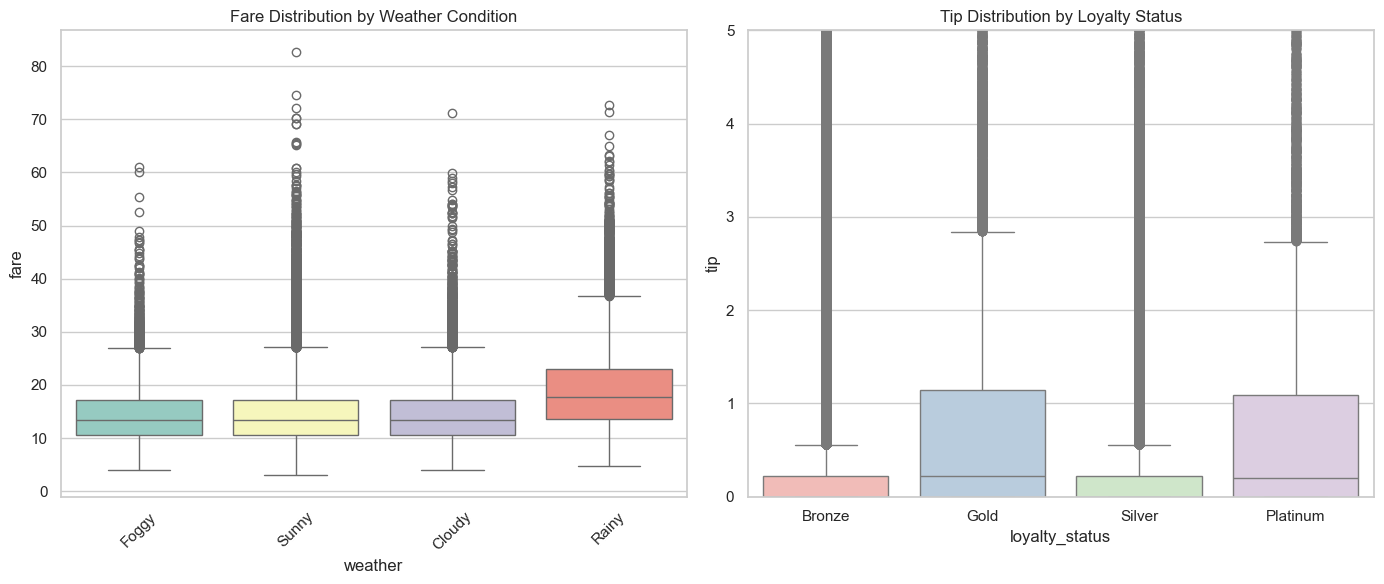

In [23]:
plt.figure(figsize=(14, 6))

# 1. Relationship: Weather vs Fare (FIXED)
plt.subplot(1, 2, 1)
sns.boxplot(
    data=merged, 
    x='weather', 
    y='fare', 
    hue='weather',    # Assign hue to the same variable as x
    palette='Set3', 
    legend=False      # Hide the legend since it's redundant here
)
plt.title('Fare Distribution by Weather Condition')
plt.xticks(rotation=45)

# 2. Relationship: Loyalty Status vs Tip (FIXED)
plt.subplot(1, 2, 2)
sns.boxplot(
    data=merged, 
    x='loyalty_status', 
    y='tip', 
    hue='loyalty_status', # Assign hue to the same variable as x
    palette='Pastel1', 
    legend=False          # Hide the legend
)
plt.title('Tip Distribution by Loyalty Status')
plt.ylim(0, 5) 

plt.tight_layout()
plt.show()

**INSIGHTS** The boxplots show how external factors influence fare and tipping behavior. Fares tend to be higher during rainy conditions, with a wider spread indicating more variability in pricing. Sunny and cloudy weather show more stable fare patterns. For tips, loyalty status plays a clear role: Gold and Platinum customers consistently tip more, while Bronze users show the lowest tipping levels. This suggests loyalty programs may positively influence tipping behavior. Rainy weather likely increases demand or trip difficulty, leading to higher fares. The broader distribution also suggests more surge pricing during adverse conditions. On the loyalty side, higher-tier customers may have stronger engagement or satisfaction, reflected in their tipping habits. These insights can help refine pricing strategies, weather‑based forecasting, and loyalty program design to improve both revenue and customer experience.

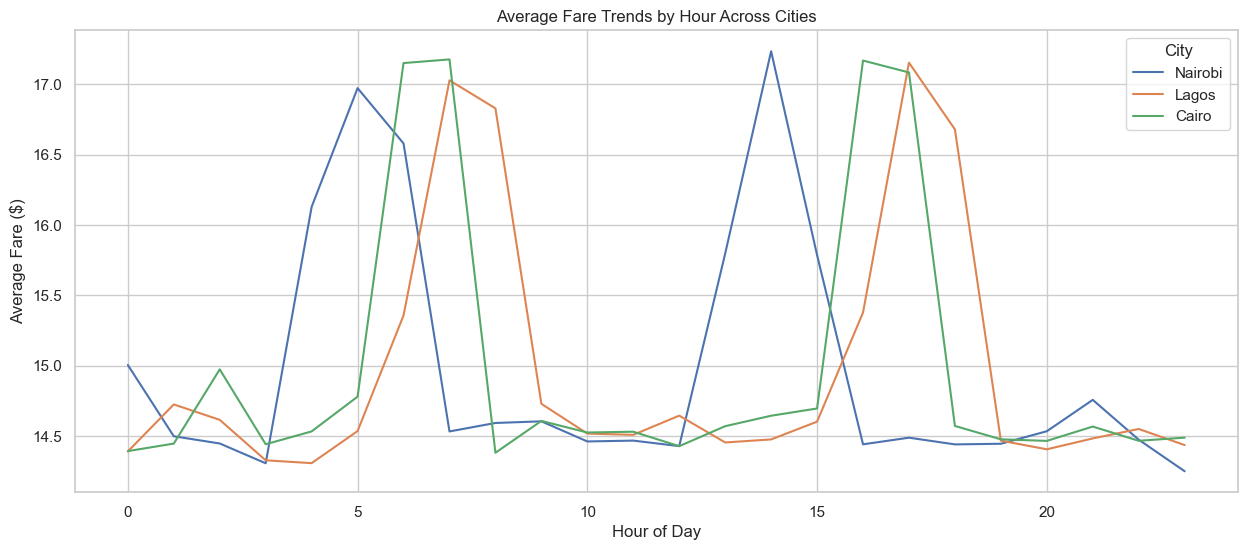

In [24]:
# Checking if fare patterns over time differ by city
plt.figure(figsize=(15, 6))

# UPDATED: Changed 'ci=None' to 'errorbar=None'
sns.lineplot(
    data=merged, 
    x='pickup_hour', 
    y='fare', 
    hue='city_trip', 
    errorbar=None 
)

plt.title('Average Fare Trends by Hour Across Cities')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare ($)')
plt.legend(title='City')
plt.show()

**INSIGHTS** The lineplot shows clear hourly fare patterns across Nairobi, Lagos, and Cairo. All three cities experience noticeable fare increases during early‑morning and late‑afternoon hours, aligning with typical rush‑hour demand. Nairobi shows slightly sharper fluctuations, while Lagos and Cairo follow smoother, parallel trends. Midday fares remain relatively stable across cities, suggesting consistent demand. Overall, the chart highlights predictable daily pricing cycles influenced by commuter behavior. These recurring peaks indicate strong demand-driven pricing, likely tied to work commutes and traffic congestion. Understanding these patterns can support better driver allocation, surge‑pricing optimization, and more accurate forecasting models.

In [25]:
# 1. Calculate duration in minutes
merged['trip_duration_mins'] = (merged['dropoff_time'] - merged['pickup_time']).dt.total_seconds() / 60

# 2. Check for unrealistic values (e.g., negative duration or 0 minutes)
print(f"Negative durations found: {(merged['trip_duration_mins'] <= 0).sum()}")

# 3. this Filter out trips shorter than 1 minute or longer than 5 hours (potential outliers)
merged = merged[(merged['trip_duration_mins'] > 1) & (merged['trip_duration_mins'] < 300)]

Negative durations found: 0


**INSIGHT** The code above is simply counting how many trips have a duration less than or equal to zero and in my cleaned dataset, none do. also, we can see there are no negative or zero‑minute trips left after my preprocessing.

In [26]:
# Extract features for analysis
merged['pickup_hour'] = merged['pickup_time'].dt.hour
merged['day_of_week'] = merged['pickup_time'].dt.day_name()
merged['is_weekend'] = merged['pickup_time'].dt.dayofweek.isin([5, 6]).astype(int)

# Preview the new columns
merged[['pickup_time', 'dropoff_time', 'trip_duration_mins', 'day_of_week']].head()

,pickup_time,dropoff_time,trip_duration_mins,day_of_week
0,2024-11-27 16:14:50+00:00,2024-11-27 17:06:50+00:00,52.0,Wednesday
1,2024-10-28 22:59:48+00:00,2024-10-28 23:12:48+00:00,13.0,Monday
2,2025-02-17 03:09:41+00:00,2025-02-17 03:25:41+00:00,16.0,Monday
3,2024-06-18 17:22:14+00:00,2024-06-18 17:27:14+00:00,5.0,Tuesday
4,2024-10-05 07:31:16+00:00,2024-10-05 08:01:16+00:00,30.0,Saturday


**INSIGHT**This step basically pulls out the key time features from each trip so I can analyze patterns more easily. I’m grabbing the pickup hour, the day of the week, and whether the trip happened on a weekend. These new columns make it much simpler to spot trends like peak hours, weekday vs. weekend behavior, and how trip duration varies across different days. These rows show that trip durations vary widely depending on the time and day. You’ve got short weekday trips of just a few minutes, longer mid‑day rides, and early‑morning or weekend trips that stretch to half an hour or more. The day_of_week column makes it easy to start spotting patterns E.g, whether certain days tend to have longer or shorter rides.

In [28]:
    
def haversine(lat1, lon1, lat2, lon2):
    # Radius of Earth in kilometers
    R = 6371.0 
    
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    
    a = np.sin(dphi / 2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2.0)**2
    c = 2.0 * np.arctan2(np.sqrt(a), np.sqrt(1.0 - a))
    return R * c

# Appling the formula to the trips
merged['trip_distance_km'] = haversine(
    merged['pickup_lat'], merged['pickup_lng'], 
    merged['dropoff_lat'], merged['dropoff_lng']
)

**INSIGHT** The Haversine formula calculates the actual distance between pickup and dropoff points using their GPS coordinates. Adding trip_distance_km gives you a much clearer picture of how far each ride really was. This helps you analyze fare fairness, duration vs. distance patterns, detect unusual trips, and build stronger models later on.

## EDA Conclusion

This EDA gave me a clear understanding of how trips behave across time, location, weather, and customer segments. After cleaning and enriching the dataset, I engineered key features like trip duration, pickup hour, day of week, weekend indicators, and actual trip distance using the Haversine formula. These additions helped uncover meaningful patterns in fares, tips, and rider behavior. Overall, the dataset is now fully structured, insightful, and ready for modeling or deeper analysis.